# Experiment Re-Run w/ Processing Adjustment

Due to feature analysis, decided to switch to a model trained on cropped/aligned faces. Experiments to re-run:
- Race faces
- Politician faces
- Occupation faces
- Average faces

In [1]:
import os
import sys
import pandas as pd
sys.path.insert(0, os.path.abspath('..'))

%load_ext autoreload
%autoreload 2

%cd /Users/steed/caliskan/git/caliskan-image-bias/caliskan-retraining-inception

/Users/steed/caliskan/git/caliskan-image-bias/caliskan-retraining-inception


In [2]:
# WARNING: removes any cached models - fresh start for this session
%rm models/*.pkl

## Random Faces

Using TensorFlow backend.


Generating Attractive regressor
Extracting training features for data/maxdistinct_aligned...
Extracting labels for data/maxdistinct_aligned...
Cross validating...
Generating predictions for a test on 300 Random Faces
Exported predictions to CSV
- Random Faces
 rho=0.2901 p=0.0000
MSE: 0.973880 (+/- 0.003739)
1/5
2/5
3/5
4/5
5/5
Pearson coeff by source
- Random Faces
 rho=0.2901 p=0.0000
- Maximally Distinct
 rho=0.9894 p=0.0000
Pearson coeff by source
- Random Faces
 rho=0.2901 p=0.0000
- Maximally Distinct
 rho=0.9894 p=0.0000
Pearson coeff by source
- Random Faces
 rho=0.2901 p=0.0000
- Maximally Distinct
 rho=0.9894 p=0.0000
Generating Competent regressor
Extracting training features for data/maxdistinct_aligned...
Extracting labels for data/maxdistinct_aligned...
Cross validating...
Generating predictions for a test on 300 Random Faces
Exported predictions to CSV
- Random Faces
 rho=0.3096 p=0.0000
MSE: 0.970914 (+/- 0.002189)
1/5
2/5
3/5
4/5
5/5
Pearson coeff by source
- Random Fa

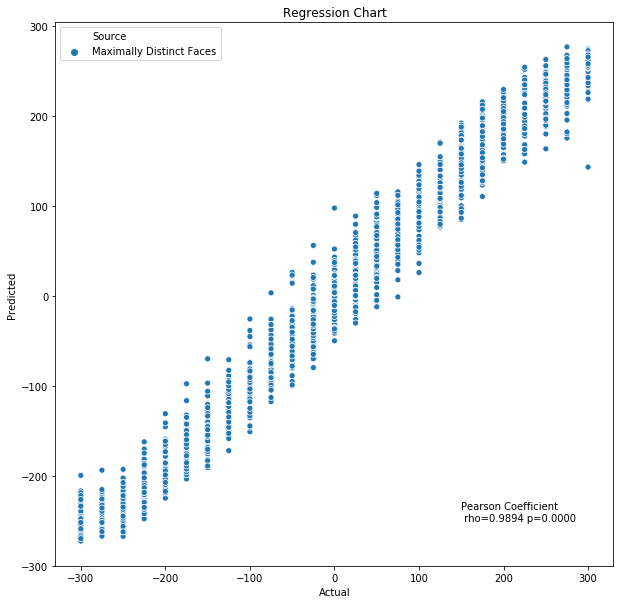

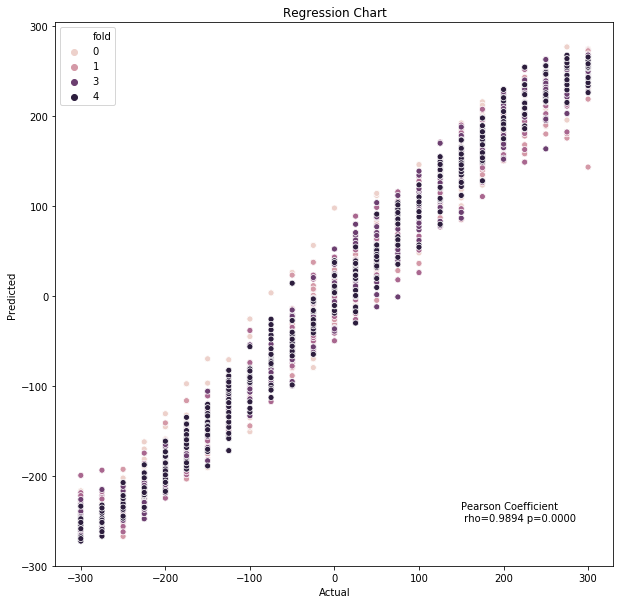

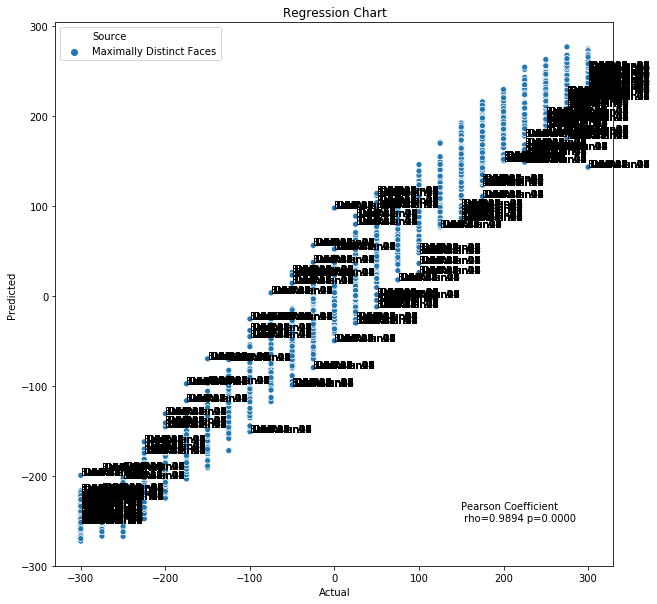

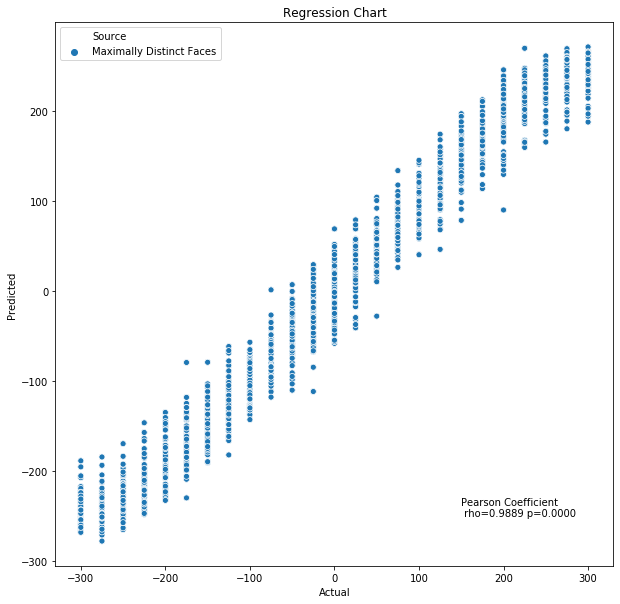

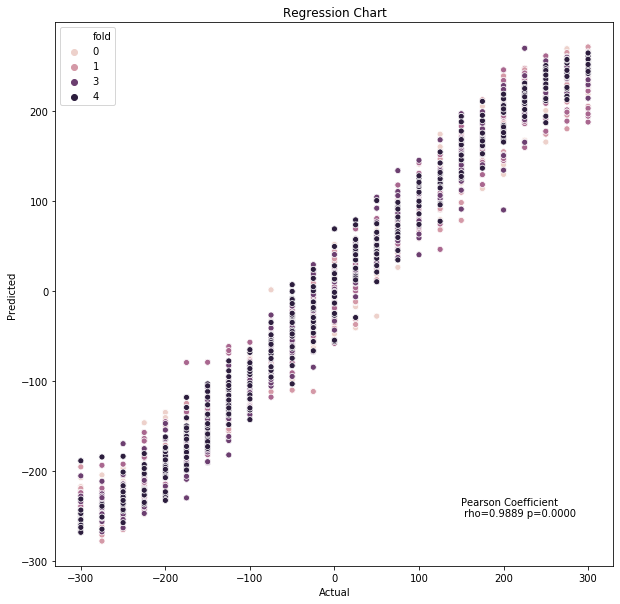

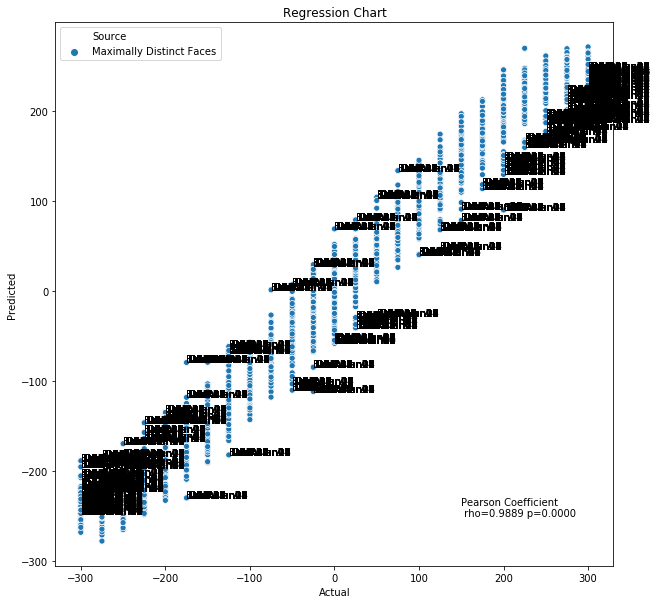

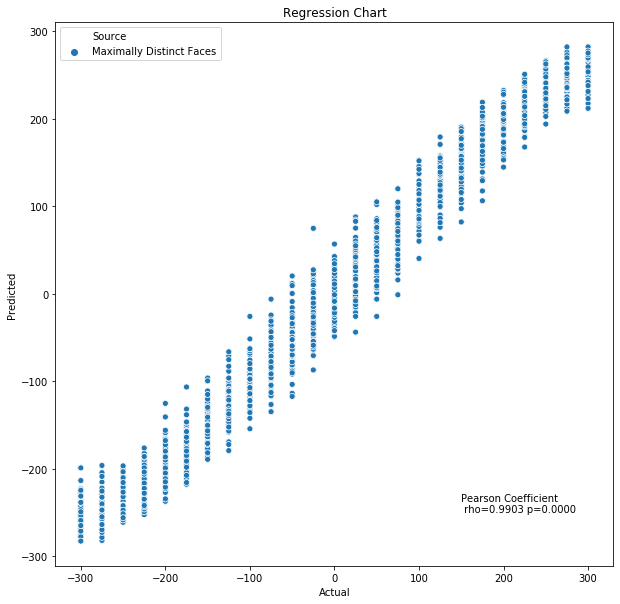

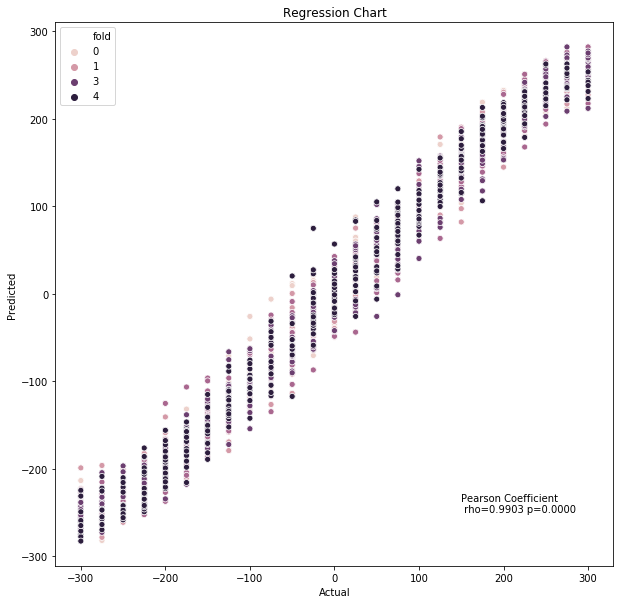

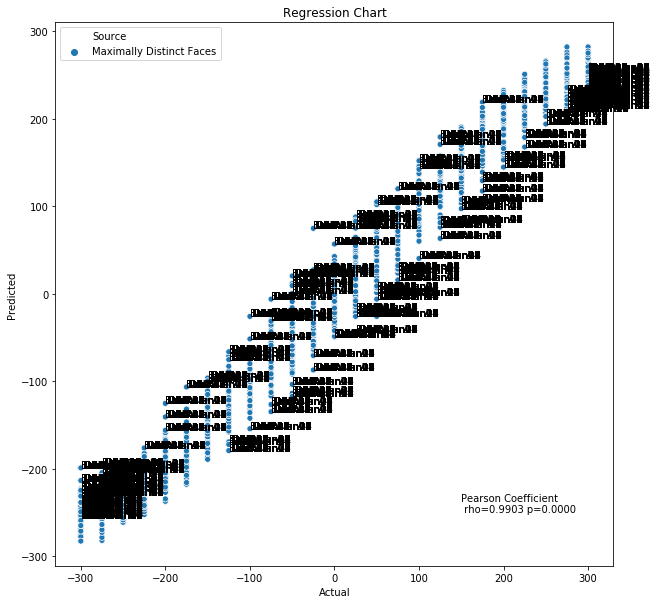

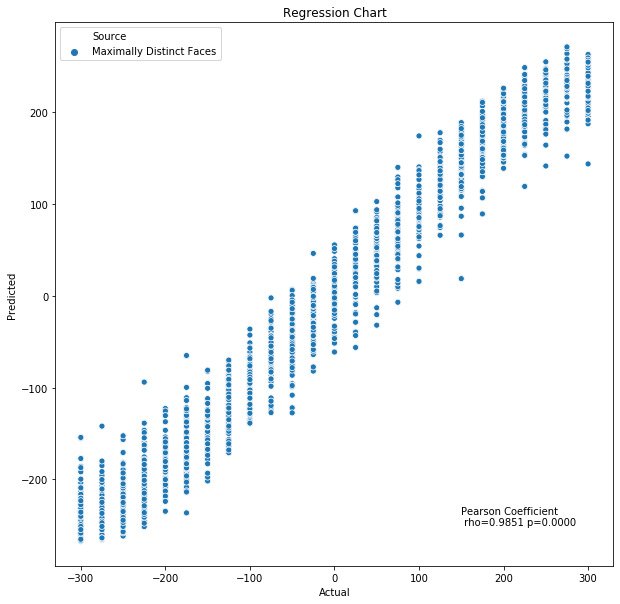

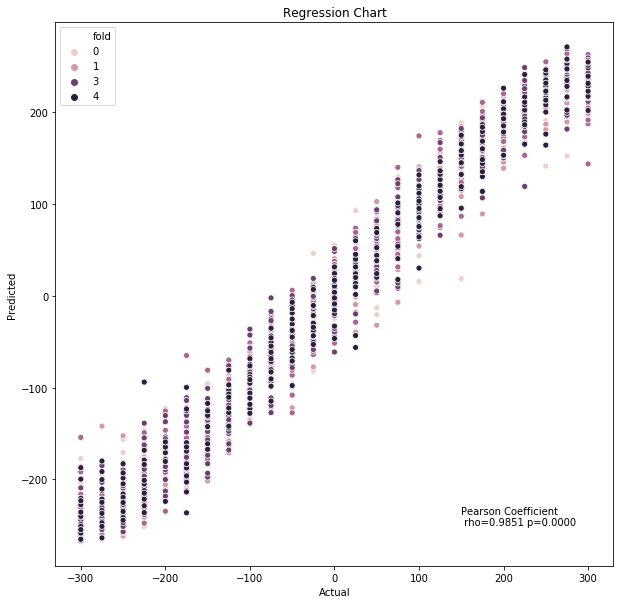

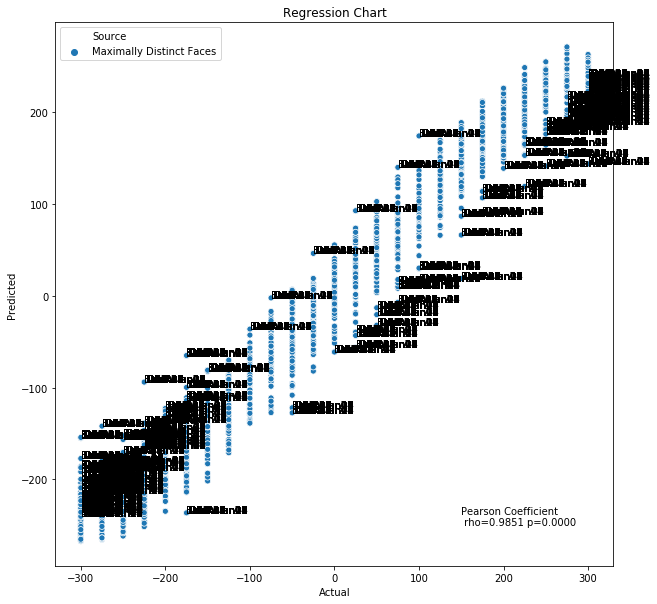

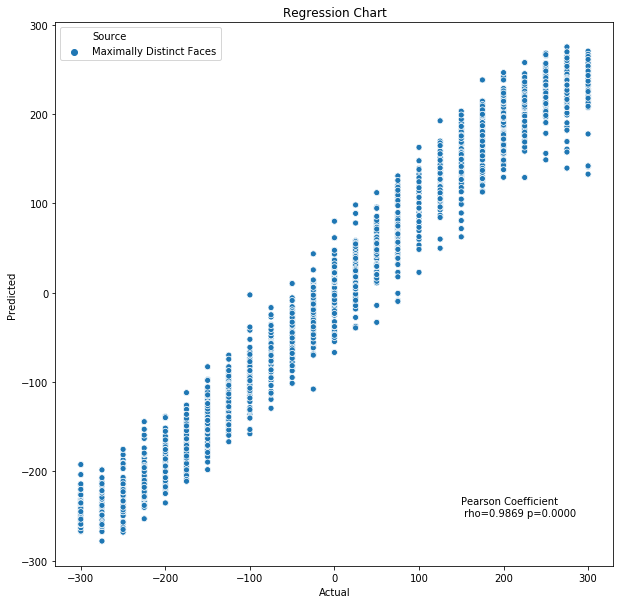

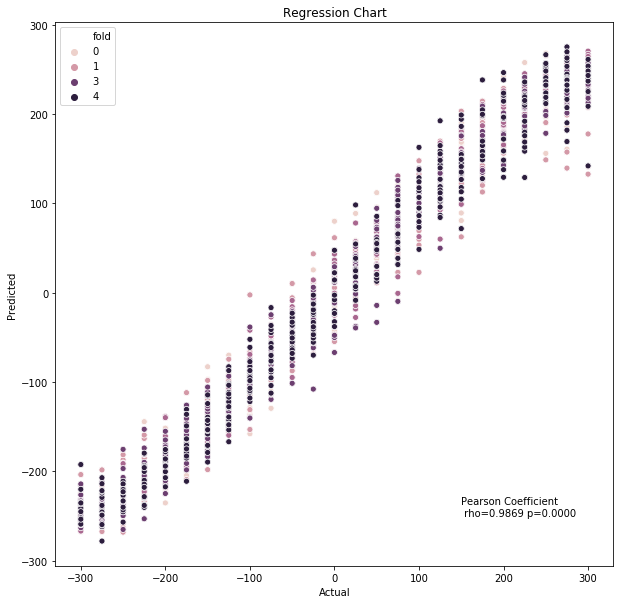

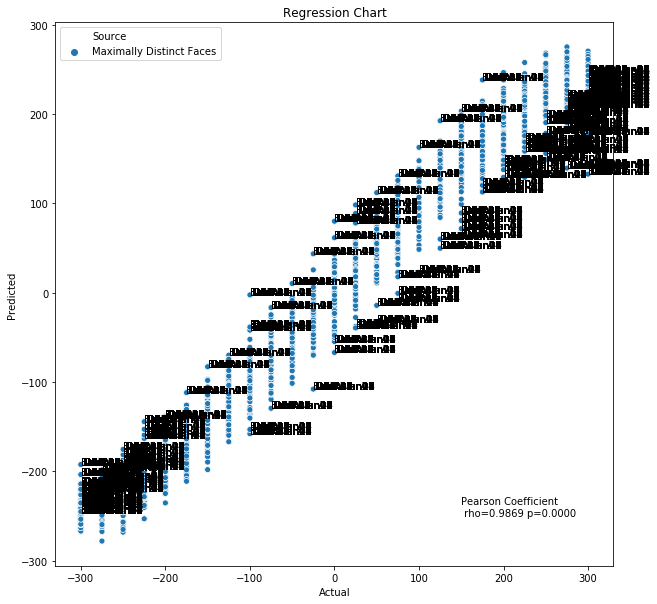

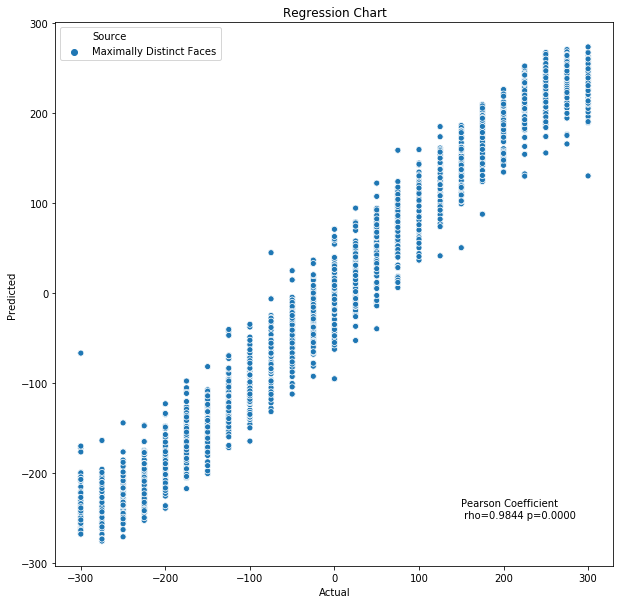

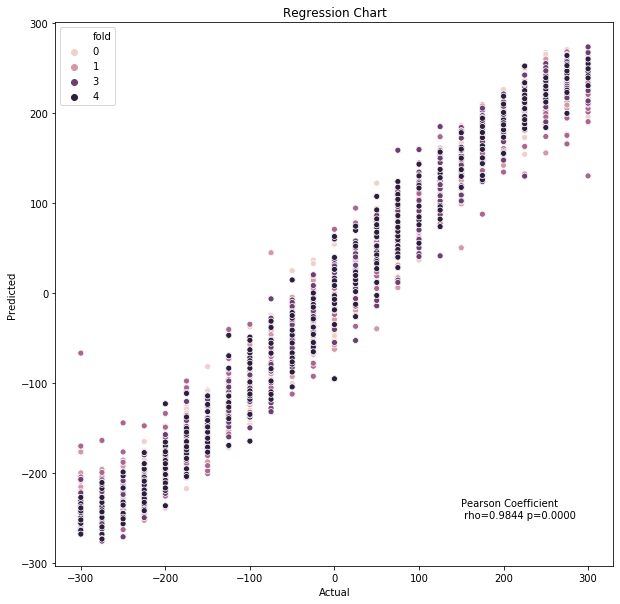

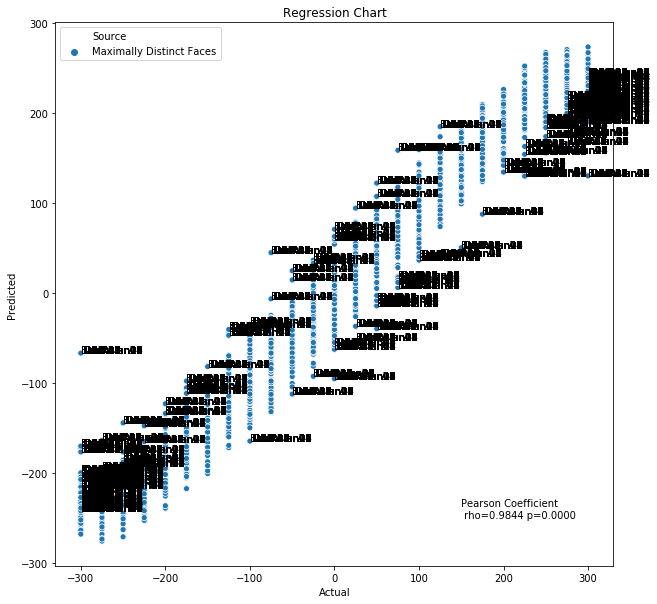

In [3]:
from appearance_bias.api import regress_all

regress_all(image_dirs=["data/maxdistinct_aligned"], cross_validate=True)

## Election Outcomes

In [4]:
regress_all(image_dirs=["data/maxdistinct_aligned"], test_dir="data/politicians-database_aligned")

Generating Attractive regressor
Extracting test features...
Predicting test images...
count    543.000000
mean      88.104512
std      110.967687
min     -231.750000
25%       47.500000
50%      116.000000
75%      166.000000
max      253.500000
Name: pred, dtype: float64
count    1875.000000
mean        0.000000
std       180.325657
min      -300.000000
25%      -150.000000
50%         0.000000
75%       150.000000
max       300.000000
Name: Attractive, dtype: float64
Generating Competent regressor
Extracting test features...
Predicting test images...
count    543.000000
mean      30.885359
std      100.086591
min     -209.500000
25%      -40.000000
50%       36.750000
75%      108.750000
max      220.000000
Name: pred, dtype: float64
count    1875.000000
mean        0.000000
std       180.325657
min      -300.000000
25%      -150.000000
50%         0.000000
75%       150.000000
max       300.000000
Name: Competent, dtype: float64
Generating Dominant regressor
Extracting test features

### Error Analysis

In [5]:
results = pd.read_csv("output/preds/preds-politicians_election-results.csv", index_col=0)
preds = pd.read_csv("output/preds/politicians-database_aligned-preds_all.csv", index_col=0)
results

,Face.name.x,pred_Competent.x,pred_Trustworthy,pred_Likeable,pred_Attractive,pred_Dominant,pred_Extroverted,Candidate,Race,Year,...,Age,Face.name.y,Votes.y,Individual.ID.y,Competency.y,pred_Competent.y,vote_diff,spread,spread_competency_ground,spread_competency_pred
1,S2008AL0001N0002,-83.75,-101.00,-162.00,-112.25,205.50,-70.00,Sessions,S,2008,...,63.0,S2008AL0001T0001,752391,1,NaN,105.50,552992,0.268733,NaN,-189.25
2,S2008AK0002N0004,9.75,32.75,198.00,218.50,128.50,20.25,Stevens,S,2008,...,86.0,S2008AK0002T0003,151767,3,NaN,-31.25,-3953,-0.013195,NaN,41.00
3,S2008CO0003T0005,71.75,-10.50,143.25,200.00,-23.50,110.75,Udall,S,2008,...,59.0,S2008CO0003N0006,990755,6,NaN,-35.50,240239,0.108131,NaN,107.25
4,S2008GA0004T0007,-117.00,-48.00,-7.25,-27.50,92.00,-88.50,Martin,S,2008,...,64.0,S2008GA0004N0008,1228033,8,NaN,-25.75,-318110,-0.148792,NaN,-91.25
5,S2008ID0005N0010,-48.50,-67.00,-135.00,-148.00,168.50,59.00,Risch,S,2008,...,66.0,S2008ID0005T0009,219903,9,NaN,-50.25,151841,0.256641,NaN,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,G1996IN0266N0532,-80.25,8.25,-99.50,-118.75,136.00,17.25,Goldsmith,G,1996,...,NaN,G1996IN0266T0531,1087128,531,19.787743,23.00,-100146,-0.048284,-38.030979,-103.25
255,G1996NC0267N0534,3.00,-7.25,136.50,185.25,72.00,-61.50,Hayes,G,1996,...,64.0,G1996NC0267T0533,1436638,533,86.341957,5.50,-339585,-0.134028,-171.139407,-2.50
256,G1996ND0268T0535,-16.00,-22.00,138.50,90.75,154.25,-96.50,Kaldor,G,1996,...,NaN,G1996ND0268N0536,174937,536,-42.012598,70.75,-85588,-0.323846,85.569703,-86.75
257,G1996UT0269T0537,-26.75,65.75,185.25,172.00,158.00,-24.00,Bradley,G,1996,...,NaN,G1996UT0269N0538,503693,538,162.403915,32.25,-347077,-0.525628,-323.263324,-59.00


## Nationality Bias

In [6]:
regress_all(image_dirs=["data/maxdistinct_aligned"], test_dir="data/average-faces")

Generating Attractive regressor
Extracting test features...
Predicting test images...
count    111.000000
mean      48.198198
std      122.184074
min     -209.500000
25%      -74.375000
50%       85.500000
75%      153.250000
max      237.250000
Name: pred, dtype: float64
count    1875.000000
mean        0.000000
std       180.325657
min      -300.000000
25%      -150.000000
50%         0.000000
75%       150.000000
max       300.000000
Name: Attractive, dtype: float64
Generating Competent regressor
Extracting test features...
Predicting test images...
count    111.000000
mean      -2.677928
std       69.424619
min     -194.750000
25%      -37.250000
50%        5.250000
75%       42.250000
max      211.750000
Name: pred, dtype: float64
count    1875.000000
mean        0.000000
std       180.325657
min      -300.000000
25%      -150.000000
50%         0.000000
75%       150.000000
max       300.000000
Name: Competent, dtype: float64
Generating Dominant regressor
Extracting test features

## Race Bias

In [7]:
regress_all(image_dirs=["data/maxdistinct_aligned"], test_dir="data/people_all_aligned")

Generating Attractive regressor
Extracting test features...
Predicting test images...
count    355.000000
mean     138.267606
std      102.118881
min     -234.000000
25%      109.500000
50%      166.250000
75%      211.250000
max      263.750000
Name: pred, dtype: float64
count    1875.000000
mean        0.000000
std       180.325657
min      -300.000000
25%      -150.000000
50%         0.000000
75%       150.000000
max       300.000000
Name: Attractive, dtype: float64
Generating Competent regressor
Extracting test features...
Predicting test images...
count    355.000000
mean      19.911268
std      102.558764
min     -236.000000
25%      -52.250000
50%       25.250000
75%       98.000000
max      239.500000
Name: pred, dtype: float64
count    1875.000000
mean        0.000000
std       180.325657
min      -300.000000
25%      -150.000000
50%         0.000000
75%       150.000000
max       300.000000
Name: Competent, dtype: float64
Generating Dominant regressor
Extracting test features

## Occupation/Gender Bias

In [8]:
regress_all(image_dirs=["data/maxdistinct_aligned"], test_dir="data/occupations_aligned")

Generating Attractive regressor
Extracting test features...
Predicting test images...
count    499.000000
mean     102.246994
std      114.829083
min     -227.500000
25%       59.250000
50%      140.000000
75%      185.625000
max      259.250000
Name: pred, dtype: float64
count    1875.000000
mean        0.000000
std       180.325657
min      -300.000000
25%      -150.000000
50%         0.000000
75%       150.000000
max       300.000000
Name: Attractive, dtype: float64
Generating Competent regressor
Extracting test features...
Predicting test images...
count    499.000000
mean       3.041082
std       99.490867
min     -240.750000
25%      -70.875000
50%        3.000000
75%       83.125000
max      240.750000
Name: pred, dtype: float64
count    1875.000000
mean        0.000000
std       180.325657
min      -300.000000
25%      -150.000000
50%         0.000000
75%       150.000000
max       300.000000
Name: Competent, dtype: float64
Generating Dominant regressor
Extracting test features

Analyze all of these predictions with `scripts/plot_preds.R`.